In [3]:
import nltk
from nltk import FreqDist, ConditionalFreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pickle


# A. imports necessary module

In [4]:

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1mscds19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1mscds19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# B. opens the text files and reads in the content as text strings
# (Assuming you have the text files for Jane Austen novels, replace the file paths accordingly)

In [5]:
file_paths = ['austen1.txt', 'austen2.txt', 'austen3.txt']  # Replace with actual file paths
corpus = ""

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        corpus += file.read()

# C. builds the following objects, a_ for Austen

# 1. a_toks: word tokens, all in lowercase

In [6]:
nltk.download('stopwords')
nltk.download('punkt')  # Run this separately

a_toks = nltk.word_tokenize(corpus.lower())
print(a_toks)

['by', 'esther', 'lombardi', 'esther', 'lombardi', 'literature', 'expert', 'm.a.', ',', 'english', 'literature', ',', 'california', 'state', 'university', '-', 'sacramento', 'b.a.', ',', 'english', ',', 'california', 'state', 'university', '-', 'sacramento', 'esther', 'lombardi', ',', 'm.a.', ',', 'is', 'a', 'journalist', 'who', 'has', 'covered', 'books', 'and', 'literature', 'for', 'over', 'twenty', 'years', '.', 'learn', 'about', 'our', 'editorial', 'process', 'updated', 'on', 'april', '02', ',', '2018', 'jane', 'austen', 'is', 'recognized', 'as', 'one', 'of', 'the', 'most', 'important', 'english', 'writers', 'of', 'her', 'time', '.', 'she', "'s", 'probably', 'most', 'famous', 'for', 'her', 'novel', 'pride', 'and', 'prejudice', ',', 'but', 'others', 'like', 'mansfield', 'park', ',', 'are', 'very', 'popular', '.', 'her', 'books', 'largely', 'dealt', 'with', 'themes', 'of', 'love', 'and', 'a', 'woman', "'s", 'role', 'in', 'the', 'home', '.', 'while', 'many', 'readers', 'try', 'to', 're

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1mscds19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1mscds19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. a_tokfd: word frequency distribution

In [7]:
a_tokfd = FreqDist(a_toks)
print(a_tokfd)


<FreqDist with 1018 samples and 3368 outcomes>


# 3. a_bigrams: word bigrams, cast as a list

In [8]:
a_bigrams = list(nltk.bigrams(a_toks))
print(a_bigrams)


[('by', 'esther'), ('esther', 'lombardi'), ('lombardi', 'esther'), ('esther', 'lombardi'), ('lombardi', 'literature'), ('literature', 'expert'), ('expert', 'm.a.'), ('m.a.', ','), (',', 'english'), ('english', 'literature'), ('literature', ','), (',', 'california'), ('california', 'state'), ('state', 'university'), ('university', '-'), ('-', 'sacramento'), ('sacramento', 'b.a.'), ('b.a.', ','), (',', 'english'), ('english', ','), (',', 'california'), ('california', 'state'), ('state', 'university'), ('university', '-'), ('-', 'sacramento'), ('sacramento', 'esther'), ('esther', 'lombardi'), ('lombardi', ','), (',', 'm.a.'), ('m.a.', ','), (',', 'is'), ('is', 'a'), ('a', 'journalist'), ('journalist', 'who'), ('who', 'has'), ('has', 'covered'), ('covered', 'books'), ('books', 'and'), ('and', 'literature'), ('literature', 'for'), ('for', 'over'), ('over', 'twenty'), ('twenty', 'years'), ('years', '.'), ('.', 'learn'), ('learn', 'about'), ('about', 'our'), ('our', 'editorial'), ('editorial'

# 4. a_bigramfd: bigram frequency distribution

In [9]:
a_bigramfd = FreqDist(a_bigrams)
print(a_bigramfd)


<FreqDist with 2589 samples and 3367 outcomes>


# 5. a_bigramcfd: bigram (w1, w2) conditional frequency distribution ("CFD")

In [10]:
a_bigramcfd = ConditionalFreqDist((w1, w2) for w1, w2 in a_bigrams)
print(a_bigramcfd)


<ConditionalFreqDist with 1018 conditions>


# D. pickles the bigram CFDs using the highest binary protocol

In [11]:
with open('austen_bigramcfd.pkl', 'wb') as pickle_file:
    pickle.dump(a_bigramcfd, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

    

# E. answers the questions by exploring the objects


# 1. How many word tokens and types are there?

In [12]:
num_tokens = len(a_toks)
num_types = len(set(a_toks))
print(f"Number of word tokens: {num_tokens}")
print(f"Number of word types: {num_types}")


Number of word tokens: 3368
Number of word types: 1018


# 2. What are the top 20 most frequent words and their counts?

Top 20 most frequent words and their counts:
,: 190
.: 155
the: 114
and: 96
to: 92
of: 84
her: 84
a: 65
is: 63
she: 48
in: 45
mr: 44
's: 42
darcy: 39
emma: 35
for: 33
elizabeth: 31
with: 30
his: 27
bennet: 26


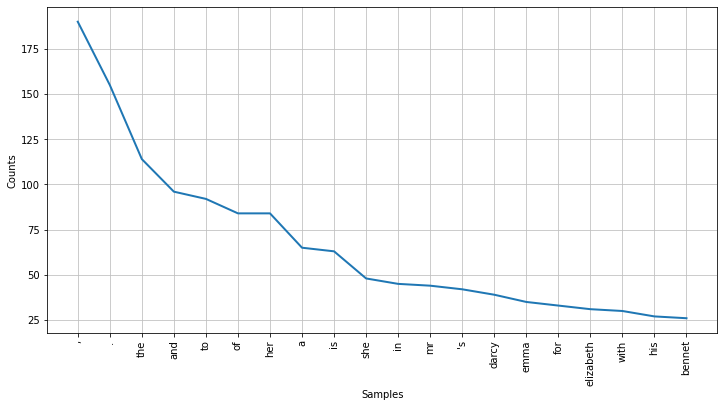

In [28]:
# Assuming you have a frequency distribution object named a_tokfd
top_words = a_tokfd.most_common(20)

# Print the top 20 most frequent words and their counts
print("Top 20 most frequent words and their counts:")
for word, count in top_words:
    print(f"{word}: {count}")

# Draw a chart for the top 20 most frequent words
plt.figure(figsize=(12, 6))
a_tokfd.plot(20, cumulative=False)
plt.show()


# 3. What are the top 20 most frequent word bigrams and their counts?, omitting bigrams that contain stopwords

In [14]:
stop_words = set(stopwords.words('english'))
filtered_bigrams = [(w1, w2) for w1, w2 in a_bigrams if w1 not in stop_words and w2 not in stop_words]
top_bigrams = FreqDist(filtered_bigrams).most_common(20)
print("Top 20 most frequent word bigrams (without stopwords) and their counts:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")

Top 20 most frequent word bigrams (without stopwords) and their counts:
('mr', 'darcy'): 28
('mr.', 'knightley'): 13
('.', 'mr'): 11
('darcy', "'s"): 10
('mr', 'bingley'): 9
('.', 'elizabeth'): 9
(',', 'emma'): 9
('mr.', 'elton'): 8
('.', 'emma'): 7
('austen', "'s"): 6
('darcy', ','): 6
('bingley', "'s"): 6
('bennet', '–'): 6
('jane', 'austen'): 5
('mrs', 'bennet'): 5
('bingley', ','): 5
('emma', '’'): 5
("''", '.'): 4
('bennet', 'family'): 4
('estate', ','): 4


# 4. What are the top 20 most frequent word bigrams and their counts?, omitting bigrams that contain stopwords



same as 3

# 5. What are the top 20 most frequent word bigrams and their counts?, omitting bigrams that contain stopwords?
# Draw chart using Matplotlib’s plot() method

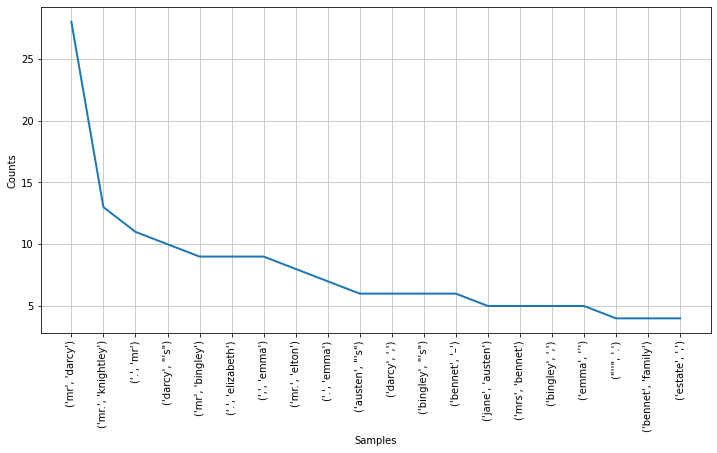

In [15]:
plt.figure(figsize=(12, 6))
FreqDist(filtered_bigrams).plot(20, cumulative=False)
plt.show()

# 6. How many times does the word 'so' occur? What are their relative frequency against the corpus size?

In [16]:
so_count = a_tokfd['so']
relative_frequency = so_count / num_tokens
print(f"The word 'so' occurs {so_count} times with a relative frequency of {relative_frequency:.4f}")


The word 'so' occurs 2 times with a relative frequency of 0.0006


# 7. What are the top 20 'so-initial' bigrams and their counts?

In [17]:
so_initial_bigrams = [bigram for bigram in a_bigrams if bigram[0] == 'so']
top_so_initial_bigrams = FreqDist(so_initial_bigrams).most_common(20)
print("Top 20 'so-initial' bigrams and their counts:")
for bigram, count in top_so_initial_bigrams:
    print(f"{bigram}: {count}")


Top 20 'so-initial' bigrams and their counts:
('so', 'does'): 1
('so', 'others'): 1


# 8. Given the word 'so' as the current word, what is the probability of getting 'much' as the next word?


In [21]:
so_much_probability = a_bigramcfd['so']['much'] / a_tokfd['so']
print(f"Probability of 'so much': {so_much_probability:.4f}")


Probability of 'so much': 0.0000


# 9. Given the word 'so' as the current word, what is the probability of getting 'will' as the next word?

In [27]:
so_will_probability = a_bigramcfd['so']['will'] / a_tokfd['so']
print(f"Probability of 'so will': {so_will_probability:.4f}")


Probability of 'so will': 0.0000


In [23]:
import nltk
from nltk import FreqDist, ConditionalFreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pickle

# Set NLTK data path explicitly
nltk.data.path.append("/path/to/nltk_data")  # Replace "/path/to/nltk_data" with the actual path

# Download necessary datasets
nltk.download('stopwords', download_dir="/path/to/nltk_data")
nltk.download('punkt', download_dir="/path/to/nltk_data")

# Rest of the code...


[nltk_data] Downloading package stopwords to /path/to/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /path/to/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
nltk.download('stopwords', download_dir="/path/to/nltk_data")



[nltk_data] Downloading package stopwords to /path/to/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True